In [1]:
%matplotlib inline

In [2]:
import pandas_ml as pdml

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 3)

In [4]:
df = pdml.ModelFrame(np.random.randn(100, 5) + np.array([1, 2, 3, 4, 5]),
                     columns=list('abcde'))
df.target = df['a']
df.head()

,a,b,c,d,e
0,0.670028,0.398383,1.168282,3.876516,4.766492
1,1.118496,2.127108,3.327253,2.782271,4.524863
2,1.024293,3.291864,3.148461,3.626145,5.040994
3,-0.677798,1.402040,4.446913,4.395288,5.386155
4,0.280390,3.556580,3.503527,4.882222,5.034740


In [5]:
df.target.name

'a'

## distplot

Calling ``sns.distplot`` shows a distribution of the ``target`` colum by default.

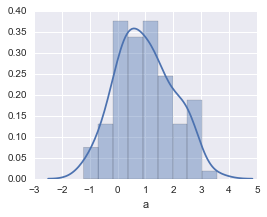

In [6]:
df.sns.distplot();

You can specify options as the same as the standard ``seaborn``.

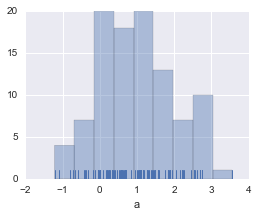

In [7]:
df.sns.distplot(kde=False, rug=True);

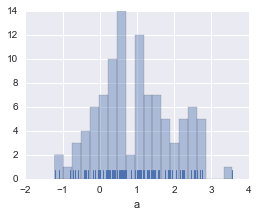

In [8]:
df.sns.distplot(bins=20, kde=False, rug=True);

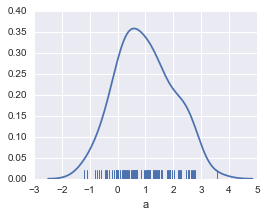

In [9]:
df.sns.distplot(hist=False, rug=True);

Specifying the column name shows distribution of the specified column.

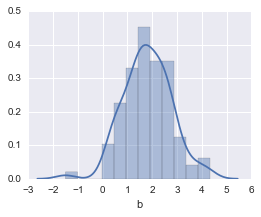

In [10]:
df.sns.distplot('b');

## kdeplot

``kdeplot`` works almost the same as ``distplot``

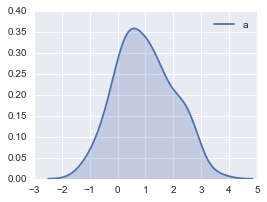

In [11]:
df.sns.kdeplot(shade=True);

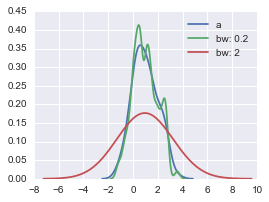

In [12]:
df.sns.kdeplot()
df.sns.kdeplot(bw=.2, label="bw: 0.2")
df.sns.kdeplot(bw=2, label="bw: 2")
plt.legend();

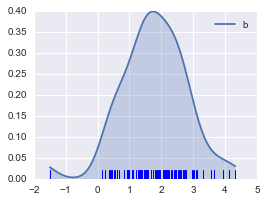

In [13]:
df.sns.kdeplot('b', shade=True, cut=0)
df.sns.rugplot('b');

## jointplot

You must specify the label of x-axis via ``x`` keyword. If ``y`` keyword is omitted, it will be a ``target`` column. 

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


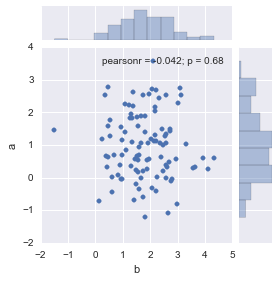

In [14]:
df.sns.jointplot('b', size=4);

If you specify both ``x`` and ``y``, it will shows the specified columns.

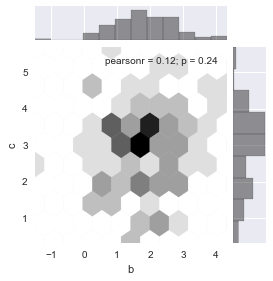

In [15]:
df.sns.jointplot('b', 'c', kind="hex", color="k", size=4);

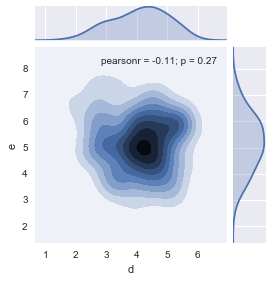

In [16]:
df.sns.jointplot("d", "e", kind="kde", size=4);

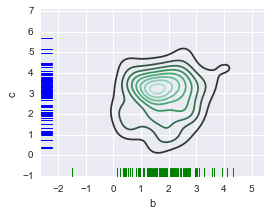

In [17]:
f, ax = plt.subplots()
df.sns.kdeplot('b', 'c', ax=ax)
df.sns.rugplot('b', color="g", ax=ax)
df.sns.rugplot('c', vertical=True, ax=ax);

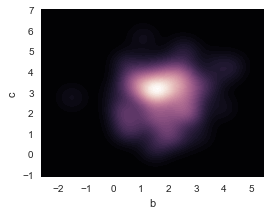

In [18]:
cmap = df.sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
df.sns.kdeplot('b', 'c', cmap=cmap, n_levels=60, shade=True);

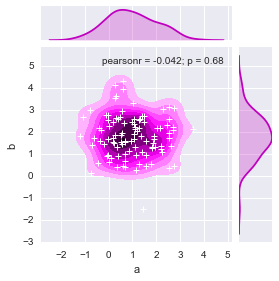

In [19]:
g = df.sns.jointplot(x="a", y="b", kind="kde", color="m", size=4)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0);

## pairplot

In [20]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris = pdml.ModelFrame(iris, target='species')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


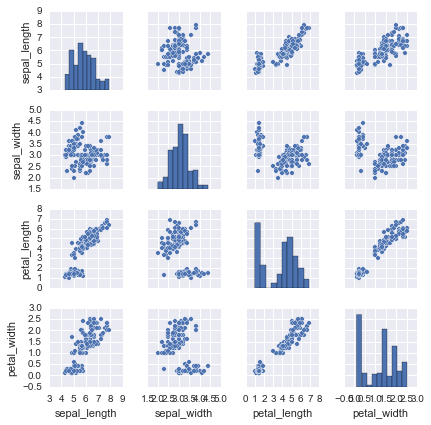

In [21]:
iris.sns.pairplot(size=1.5);

/Users/sin/miniconda/envs/py27std/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


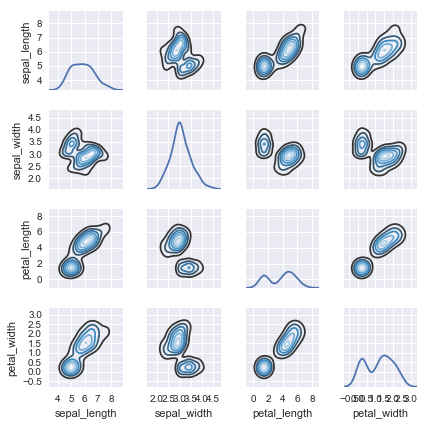

In [22]:
import seaborn as sns
g = iris.sns.PairGrid(size=1.5)
g.map_diag(iris.sns.kdeplot)
g.map_offdiag(iris.sns.kdeplot, cmap="Blues_d", n_levels=6);